### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [43]:
#importujem vsetky zakladne kniznice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
sns.set()


In [116]:
#nacitam zakladny subor
accidents = pd.read_csv("./data/accidents.csv")

In [117]:
#split accidents-rozdelim subor na 3 podla Accident_Severity
#zistim indexy pre jednotlive zaznamy
accidents_Fatal_i = np.where(accidents.Accident_Severity==1)
accidents_Serious_i = np.where(accidents.Accident_Severity==2)
accidents_Slight_i = np.where(accidents.Accident_Severity==3)

#vytvorim DF podla indexov
accidents_Fatal = accidents.iloc[accidents_Fatal_i]
accidents_Serious = accidents.iloc[accidents_Serious_i]
accidents_Slight = accidents.iloc[accidents_Slight_i]


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [ ]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
#sample_data = accidents_slight.sample(frac=0.1, random_state=1234)


In [118]:
#vyberiem 10% zaznamov nahodnym vyberom z tabulky accidents_Slight
accidents_Slight_sample = accidents_Slight.sample(frac=0.1, random_state=1234)

3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 29 650 príkladov. (2b)

In [119]:
#spojim vsetky tabulky
Accidents = pd.concat([accidents_Fatal, accidents_Serious, accidents_Slight_sample])


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [120]:
#nacitam tabulku Vehicles
Vehicles = pd.read_csv("./data/vehicles.csv")


In [121]:
#spojim Accidents upravenu a Vehicles podla indexu Accident_Index z tabulky Accidents
Accidents_all = pd.merge(left=Accidents, right=Vehicles, left_on="Accident_Index", right_on="Accident_Index", how="left")
len(Accidents_all)

79382

5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [122]:
#vytvorim novy DF s vybranymi atributmi
Accidents_new = Accidents_all[["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]]
Accidents_new.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1,1,5,1,40,984,-1,1
1,4,3,2,1,1,1,1,1,1,20,-1,-1,1
2,4,5,6,1,1,1,1,11,1,59,9600,5,1
3,5,4,6,1,1,2,1,1,1,25,-1,-1,1
4,5,4,6,1,1,2,1,9,1,29,1596,3,1


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [123]:
#nahradim -1 NaN, aby som mohla pouzivat funkcie pre NaN a spocitam Nan
Accidents_new.replace(-1, np.nan, inplace=True)
Accidents_new.isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [124]:
Accidents_new.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,NaN,1
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,NaN,NaN,1
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,NaN,NaN,1
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1


In [125]:
#pre Road_Surface_Conditions zistim najpocetnejsiu hodnotu
Road_Surface_Conditions_m = Accidents_new["Road_Surface_Conditions"].value_counts().idxmax()
Road_Surface_Conditions_m

1.0

In [126]:
#nakolko je nizky pocet chybajucich hodnot, nahradim chybajuce najpocetnejsou
Accidents_new["Road_Surface_Conditions"].fillna(Road_Surface_Conditions_m, inplace=True)
Accidents_new["Road_Surface_Conditions"].isna().sum() 

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [127]:
#aplikujem rovnaky algoritmus pre Vehicle_Type 
Vehicle_Type_m = Accidents_new["Vehicle_Type"].value_counts().idxmax()
Accidents_new["Vehicle_Type"].fillna(Vehicle_Type_m, inplace=True)
Accidents_new["Vehicle_Type"].isna().sum()

0

In [128]:
#pre atribut Sex_of_Driver priradim hodnotu 3
Accidents_new["Sex_of_Driver"].fillna(3.0, inplace=True)
Accidents_new["Sex_of_Driver"].isna().sum()

0

In [129]:
#atribut Age_of_Driver odvodim cez pivotnu tabulku
ptable = pd.pivot_table(Accidents_new, index="Sex_of_Driver", values="Age_of_Driver", aggfunc="mean")
ptable

,Age_of_Driver
Sex_of_Driver,
1.0,37.815864
2.0,38.076221
3.0,33.110294


In [130]:
#nahradim chybajuce hodnoty priemernou hodnotu veku pre danu kategoriu Sex_of_Driver
def replace_missing_age(row):
    age = row["Age_of_Driver"]
    sex = row["Sex_of_Driver"]
    if pd.isna(age):
        return ptable["Age_of_Driver"][sex]
    else:
        return age

Accidents_new["Age_of_Driver"] = Accidents_new.apply(replace_missing_age, axis=1)
Accidents_new.round({"Age_of_Driver": 0})
Accidents_new["Age_of_Driver"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0

In [131]:
#pri pomerne velkom pocte chybajucich dat sa pokusim odvodit Engine_Capacity_(CC) podla Vehicle_Type
ttable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Engine_Capacity_(CC)", aggfunc="median")
ttable

,Engine_Capacity_(CC)
Vehicle_Type,
2.0,49.0
3.0,124.0
4.0,400.0
5.0,749.0
8.0,1995.0
9.0,1598.0
10.0,2496.0
11.0,7300.0
17.0,5206.5


In [132]:
#nakolko nie vsetky hodnoty atributu Vehicle_Type maju Engine_Capacity_(CC), na zaklade analyzy moznych hodnot
#najskor doplnim udaje pre chybajuce Vehicle_Type a nasledne odvodim data cez pivot table
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 1.0, "Engine_Capacity_(CC)"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 16.0, "Engine_Capacity_(CC)"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 18.0, "Engine_Capacity_(CC)"] = 11116.0
ttable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Engine_Capacity_(CC)", aggfunc="mean")
def replace_missing_engine(row):
    engine = row["Engine_Capacity_(CC)"]
    vehicle = row["Vehicle_Type"]
    if pd.isna(engine):
        return ttable["Engine_Capacity_(CC)"][vehicle]
    else:
        return engine

Accidents_new["Engine_Capacity_(CC)"] = Accidents_new.apply(replace_missing_engine, axis=1)
Accidents_new.round({"Engine_Capacity_(CC)": 0})
Accidents_new["Engine_Capacity_(CC)"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0

In [133]:
#Age_of_Vehicle- zopakujem postup ako pri Engine_Capacity_(CC)
atable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Age_of_Vehicle", aggfunc="median")
atable

,Age_of_Vehicle
Vehicle_Type,
2.0,3.0
3.0,4.0
4.0,9.0
5.0,5.0
8.0,5.0
9.0,7.0
10.0,6.0
11.0,6.0
17.0,5.0


In [134]:
mean_value = Accidents_new["Age_of_Vehicle"].mean()
mean_value = int(mean_value)
mean_value = float(mean_value)
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 1.0, "Age_of_Vehicle"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 16.0, "Age_of_Vehicle"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 18.0, "Age_of_Vehicle"] = mean_value
atable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Age_of_Vehicle", aggfunc="median")
def replace_missing_vehicle(row):
    age = row["Age_of_Vehicle"]
    vehicle = row["Vehicle_Type"]
    if pd.isna(age):
        return atable["Age_of_Vehicle"][vehicle]
    else:
        return age

Accidents_new["Age_of_Vehicle"] = Accidents_new.apply(replace_missing_vehicle, axis=1)
Accidents_new.round({"Age_of_Vehicle": 0})
Accidents_new["Age_of_Vehicle"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0

In [135]:
Accidents_new.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1


In [136]:
Accidents_new.isna().sum()

Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Accident_Severity          0
dtype: int64

In [137]:
#v niektorych pripadoch som mala int, niekde float, prehodila som vsetko na int
Accidents_new = Accidents_new.astype(int)
Accidents_new.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1,1,5,1,40,984,5,1
1,4,3,2,1,1,1,1,1,1,20,0,0,1
2,4,5,6,1,1,1,1,11,1,59,9600,5,1
3,5,4,6,1,1,2,1,1,1,25,0,0,1
4,5,4,6,1,1,2,1,9,1,29,1596,3,1


7. Pomocou konfigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné vhodne diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)


In [70]:
#pouzijem diskretizaciu pre Age_of_Driver, ostatne atributy ponecham

In [138]:
#zistim maximalnu hornu hranicu veku
Age_of_Driver_max = Accidents_new["Age_of_Driver"].max()
Age_of_Driver_max

98

In [139]:
#intervaly pre diskretizaciu do 18, do 25, do 40, do 60, nad 60
Accidents_ord = Accidents_new.copy()
Accidents_ord["Age_of_Driver_ord"] = pd.cut(Accidents_ord["Age_of_Driver"], bins=[0, 18, 25, 40, 60, Age_of_Driver_max], include_lowest=True, labels=["teens", "young", "adult", "senior", "old"])
Accidents_ord["Age_of_Driver_ord"].value_counts()

adult     32284
senior    21210
young     13273
old        6644
teens      5971
Name: Age_of_Driver_ord, dtype: int64

In [140]:
Accidents_ord.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,adult
1,4,3,2,1,1,1,1,1,1,20,0,0,1,young
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,senior
3,5,4,6,1,1,2,1,1,1,25,0,0,1,young
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,adult


In [141]:
#vytvorim pivotnu tabulku
draw = pd.pivot_table(Accidents_ord, index=["Day_of_Week", "Sex_of_Driver", "Age_of_Driver_ord"], values="Accident_Severity")
draw

Accident_Severity
Day_of_Week Sex_of_Driver Age_of_Driver_ord                   
1           1             teens                       2.249645
                          young                       2.259341
                          adult                       2.272478
                          senior                      2.192625
                          old                         2.197044
...                                                        ...
7           3             teens                       1.500000
                          young                       2.294118
                          adult                       2.352601
                          senior                      2.250000
                          old                         2.000000

[101 rows x 1 columns]

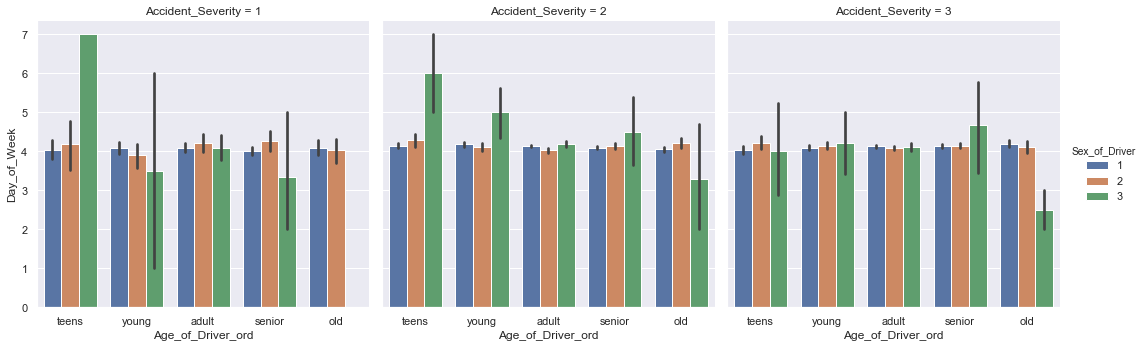

In [142]:
g = sns.catplot(x="Age_of_Driver_ord", y="Day_of_Week", hue="Sex_of_Driver", col="Accident_Severity", data=Accidents_ord, kind="bar")

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [143]:
Accidents_dat = Accidents_ord.copy()
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,adult
1,4,3,2,1,1,1,1,1,1,20,0,0,1,young
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,senior
3,5,4,6,1,1,2,1,1,1,25,0,0,1,young
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,adult


In [157]:
#atributy na normalizaciu 1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Condition,Accident_Severity
#atributy na encoder Day_of_Week,Road_Type,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver
#atributy na diskretizaciu Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
#diskretizacia Age_of_Driver-Age_of_Driver_ord,Engine_Capacity_(CC)-Engine_Capacity_ord,Age_of_Vehicle-Age_of_Vehicle_ord


In [144]:
#diskretizacia Engine_Capacity_(CC)-do 500, do 2100, do 3500, do 10000, nad 10000
Engine_Capacity_min = Accidents_new["Engine_Capacity_(CC)"].min()
Engine_Capacity_max = Accidents_new["Engine_Capacity_(CC)"].max()
Accidents_dat["Engine_Capacity_ord"] = pd.cut(Accidents_new["Engine_Capacity_(CC)"], bins=[0, 500, 2100, 3500, 10000, Engine_Capacity_max], include_lowest=True, labels=["small_cc", "middle_cc", "high_cc", "very_high_cc", "ultra_high_cc"])
Accidents_dat["Engine_Capacity_ord"].value_counts()

middle_cc        58231
small_cc          8326
high_cc           7142
very_high_cc      4640
ultra_high_cc     1043
Name: Engine_Capacity_ord, dtype: int64

In [145]:
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,adult,middle_cc
1,4,3,2,1,1,1,1,1,1,20,0,0,1,young,small_cc
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,senior,very_high_cc
3,5,4,6,1,1,2,1,1,1,25,0,0,1,young,small_cc
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,adult,middle_cc


In [146]:
#diskretizacia Age_of_Vehicle-do 3, do 7, do 10, do 15, nad 15
Age_of_Vehicle_min = Accidents_new["Age_of_Vehicle"].min()
Age_of_Vehicle_max = Accidents_new["Age_of_Vehicle"].max()
Accidents_dat["Age_of_Vehicle_ord"] = pd.cut(Accidents_new["Age_of_Vehicle"], bins=[0, 1, 3, 7, 10, Age_of_Vehicle_max], include_lowest=True, labels=["fresh", "new", "used", "old", "old-timer"])
Accidents_dat["Age_of_Vehicle_ord"].value_counts()

used         39654
new          10502
old          10257
old-timer     9896
fresh         9073
Name: Age_of_Vehicle_ord, dtype: int64

In [147]:
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,adult,middle_cc,used
1,4,3,2,1,1,1,1,1,1,20,0,0,1,young,small_cc,fresh
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,senior,very_high_cc,used
3,5,4,6,1,1,2,1,1,1,25,0,0,1,young,small_cc,fresh
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,adult,middle_cc,new


In [148]:
#premapujem diskretizovane atributy
Accidents_dat["Age_of_Driver_ord"] = Accidents_dat["Age_of_Driver_ord"].map({"teens": 0, "young": 1, "adult": 2, "senior": 3, "old": 4})
Accidents_dat["Engine_Capacity_ord"] = Accidents_dat["Engine_Capacity_ord"].map({"small_cc": 0, "middle_cc": 1, "high_cc": 2, "very_high_cc": 3, "ultra_high_cc": 4})
Accidents_dat["Age_of_Vehicle_ord"] = Accidents_dat["Age_of_Vehicle_ord"].map({"fresh": 0, "new": 1, "used": 2, "old": 3, "old-timer": 4})
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,2,1,2
1,4,3,2,1,1,1,1,1,1,20,0,0,1,1,0,0
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,3,3,2
3,5,4,6,1,1,2,1,1,1,25,0,0,1,1,0,0
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,2,1,1


In [149]:
col_encod = ["Day_of_Week", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver"]
Accidents_dat = Accidents_dat.drop(col_encod, axis=1)
col_drop = ["Engine_Capacity_(CC)", "Age_of_Vehicle", "Age_of_Driver"]
Accidents_dat = Accidents_dat.drop(col_drop, axis=1)
Accidents_dat.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,3,1,1,1,1,2,1,2
1,3,1,1,1,1,1,0,0
2,5,1,1,1,1,3,3,2
3,4,1,1,2,1,1,0,0
4,4,1,1,2,1,2,1,1


In [150]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
norm_array = min_max.fit_transform(Accidents_dat)
Accidents_dat = pd.DataFrame(norm_array, columns = Accidents_dat.columns)
Accidents_dat.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,0.4,0.0,0.0,0.00,0.0,0.50,0.25,0.50
1,0.4,0.0,0.0,0.00,0.0,0.25,0.00,0.00
2,0.8,0.0,0.0,0.00,0.0,0.75,0.75,0.50
3,0.6,0.0,0.0,0.25,0.0,0.25,0.00,0.00
4,0.6,0.0,0.0,0.25,0.0,0.50,0.25,0.25


In [151]:
Accidents_dat["Day_of_Week"] = Accidents_new["Day_of_Week"]
Accidents_dat["Road_Type"] = Accidents_new["Road_Type"]
Accidents_dat["Sex_of_Driver"] = Accidents_new["Sex_of_Driver"]
Accidents_dat["Urban_or_Rural_Area"] = Accidents_new["Urban_or_Rural_Area"]
Accidents_dat["Vehicle_Type"] = Accidents_new["Vehicle_Type"]
Accidents_dat.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord,Day_of_Week,Road_Type,Sex_of_Driver,Urban_or_Rural_Area,Vehicle_Type
0,0.4,0.0,0.0,0.00,0.0,0.50,0.25,0.50,4,2,1,1,5
1,0.4,0.0,0.0,0.00,0.0,0.25,0.00,0.00,4,2,1,1,1
2,0.8,0.0,0.0,0.00,0.0,0.75,0.75,0.50,4,6,1,1,11
3,0.6,0.0,0.0,0.25,0.0,0.25,0.00,0.00,5,6,1,1,1
4,0.6,0.0,0.0,0.25,0.0,0.50,0.25,0.25,5,6,1,1,9


In [152]:
Accidents_dat = pd.get_dummies(Accidents_dat, columns=["Day_of_Week", "Sex_of_Driver", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type"])
Accidents_dat["Accident_Severity"] = Accidents_new["Accident_Severity"]
Accidents_dat.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord,Day_of_Week_1,Day_of_Week_2,...,Vehicle_Type_9,Vehicle_Type_10,Vehicle_Type_11,Vehicle_Type_16,Vehicle_Type_17,Vehicle_Type_18,Vehicle_Type_19,Vehicle_Type_20,Vehicle_Type_21,Vehicle_Type_90
0,0.4,0.0,0.0,0.00,1,0.50,0.25,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.4,0.0,0.0,0.00,1,0.25,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.8,0.0,0.0,0.00,1,0.75,0.75,0.50,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.6,0.0,0.0,0.25,1,0.25,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.6,0.0,0.0,0.25,1,0.50,0.25,0.25,0,0,...,1,0,0,0,0,0,0,0,0,0


In [153]:
Accidents_dat.shape

(79382, 43)

9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [154]:
X_Accidents = Accidents_dat.drop("Accident_Severity", axis=1) 
y_Accidents = Accidents_dat["Accident_Severity"] 
print(X_Accidents.shape) 
print(y_Accidents.shape)

(79382, 42)
(79382,)


In [155]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents, y_Accidents, test_size=0.3, random_state=1)

10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [156]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k="all").fit(X_train, y_train)
print(mutual_info_classif(X_train, y_train, random_state = 123))

[0.00374131 0.0085146  0.0052985  0.         0.0018234  0.0021564
 0.00660986 0.00273941 0.00140795 0.         0.         0.00267496
 0.         0.00043898 0.01050758 0.00490893 0.00059387 0.0061272
 0.00082302 0.00094569 0.00629211 0.         0.         0.02019509
 0.01721591 0.00078497 0.         0.         0.         0.
 0.00465447 0.0001508  0.00704561 0.00207652 0.         0.
 0.00315515 0.00266438 0.         0.         0.00037143 0.        ]


Atribut 0: 0.007391
Atribut 1: 0.008559
Atribut 2: 0.000000
Atribut 3: 0.003180
Atribut 4: 0.004789
Atribut 5: 0.003517
Atribut 6: 0.000000
Atribut 7: 0.001537
Atribut 8: 0.000000
Atribut 9: 0.001416
Atribut 10: 0.000433
Atribut 11: 0.000000
Atribut 12: 0.000321
Atribut 13: 0.004260
Atribut 14: 0.007298
Atribut 15: 0.001231
Atribut 16: 0.000000
Atribut 17: 0.002142
Atribut 18: 0.002507
Atribut 19: 0.001663
Atribut 20: 0.005495
Atribut 21: 0.000000
Atribut 22: 0.000000
Atribut 23: 0.016123
Atribut 24: 0.020132
Atribut 25: 0.001009
Atribut 26: 0.005256
Atribut 27: 0.001607
Atribut 28: 0.001421
Atribut 29: 0.000489
Atribut 30: 0.009674
Atribut 31: 0.001598
Atribut 32: 0.010379
Atribut 33: 0.000781
Atribut 34: 0.000842
Atribut 35: 0.000000
Atribut 36: 0.000432
Atribut 37: 0.000000
Atribut 38: 0.004573
Atribut 39: 0.000000
Atribut 40: 0.000000
Atribut 41: 0.000000


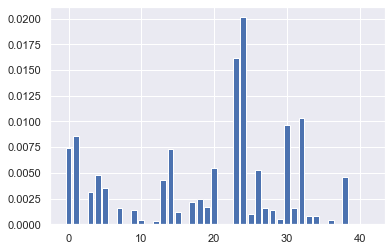

In [157]:
for i in range(len(fs.scores_)):
	print('Atribut %d: %f' % (i, fs.scores_[i]))
    
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [176]:
# KNN-pouzijeme data z predchadzajucich cviceni, len vylucim atributy s velkym poctom chybajucich dat
Accidents_knn = Accidents_ord.copy()
drop_knn = ["Engine_Capacity_(CC)", "Age_of_Vehicle"]
Accidents_knn = Accidents_knn.drop(col_drop, axis=1)
Accidents_knn["Age_of_Driver_ord"] = Accidents_knn["Age_of_Driver_ord"].map({"teens": 0, "young": 1, "adult": 2, "senior": 3, "old": 4})
Accidents_knn.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Accident_Severity,Age_of_Driver_ord
0,4,3,2,1,1,1,1,5,1,1,2
1,4,3,2,1,1,1,1,1,1,1,1
2,4,5,6,1,1,1,1,11,1,1,3
3,5,4,6,1,1,2,1,1,1,1,1
4,5,4,6,1,1,2,1,9,1,1,2


In [177]:
#upravim data pre potreby KNN
knn_encod = ["Day_of_Week", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver"]
Accidents_knn = Accidents_knn.drop(col_encod, axis=1)

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
norm_array = min_max.fit_transform(Accidents_knn)
Accidents_knn = pd.DataFrame(norm_array, columns = Accidents_knn.columns)

Accidents_knn["Day_of_Week"] = Accidents_new["Day_of_Week"]
Accidents_knn["Road_Type"] = Accidents_new["Road_Type"]
Accidents_knn["Sex_of_Driver"] = Accidents_new["Sex_of_Driver"]
Accidents_knn["Urban_or_Rural_Area"] = Accidents_new["Urban_or_Rural_Area"]
Accidents_knn["Vehicle_Type"] = Accidents_new["Vehicle_Type"]

Accidents_knn = pd.get_dummies(Accidents_knn, columns=["Day_of_Week", "Sex_of_Driver", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type"])
Accidents_knn["Accident_Severity"] = Accidents_new["Accident_Severity"]
Accidents_knn.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,...,Vehicle_Type_9,Vehicle_Type_10,Vehicle_Type_11,Vehicle_Type_16,Vehicle_Type_17,Vehicle_Type_18,Vehicle_Type_19,Vehicle_Type_20,Vehicle_Type_21,Vehicle_Type_90
0,0.4,0.0,0.0,0.00,1,0.50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.4,0.0,0.0,0.00,1,0.25,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.8,0.0,0.0,0.00,1,0.75,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0.6,0.0,0.0,0.25,1,0.25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.6,0.0,0.0,0.25,1,0.50,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [192]:
#vytvorim trenovaciu a testovaciu mnozinu
X_Accidents = Accidents_knn.drop("Accident_Severity", axis=1) 
y_Accidents = Accidents_knn["Accident_Severity"] 
print(X_Accidents.shape) 
print(y_Accidents.shape)

(79382, 40)
(79382,)


In [193]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents, y_Accidents, test_size=0.3, random_state=1)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()                       
model_knn.fit(X_train, y_train)                           
knn_model = model_knn.predict(X_test) 

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_knn = accuracy_score
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, knn_model)}")

Presnosť (accuracy) modelu: 0.5276086500104976


In [195]:
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_knn, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.52464915 0.51835193 0.52788773 0.53410113 0.52240417 0.52132446
 0.52816268 0.52943294 0.52493249 0.52061206]


In [114]:
#Decision trees
Accidents_dt = Accidents_ord
Accidents_dt.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord
0,4,3,2,1,1,1,1,5,1,40,984,5,1,adult
1,4,3,2,1,1,1,1,1,1,20,0,0,1,young
2,4,5,6,1,1,1,1,11,1,59,9600,5,1,senior
3,5,4,6,1,1,2,1,1,1,25,0,0,1,young
4,5,4,6,1,1,2,1,9,1,29,1596,3,1,adult


In [182]:
#pre velke mnozstvo chybajucich dat dropnem stlpce Engine_Capacity_(CC),Age_of_Vehicle a duplicitny Age_of_Driver_ord
Accidents_dt = Accidents_dt.drop(columns=["Age_of_Driver_ord", "Age_of_Vehicle", "Engine_Capacity_(CC)",])
Accidents_dt.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Accident_Severity
0,4,3,2,1,1,1,1,5,1,40,1
1,4,3,2,1,1,1,1,1,1,20,1
2,4,5,6,1,1,1,1,11,1,59,1
3,5,4,6,1,1,2,1,1,1,25,1
4,5,4,6,1,1,2,1,9,1,29,1


In [183]:
#OneHotEncoder pre atributy
Accidents_dt = pd.get_dummies(Accidents_dt, columns=["Day_of_Week", "Sex_of_Driver", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type"])
Accidents_dt.head()

,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Age_of_Driver,Accident_Severity,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,...,Vehicle_Type_9,Vehicle_Type_10,Vehicle_Type_11,Vehicle_Type_16,Vehicle_Type_17,Vehicle_Type_18,Vehicle_Type_19,Vehicle_Type_20,Vehicle_Type_21,Vehicle_Type_90
0,3,1,1,1,40,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,20,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,1,59,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,2,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,2,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [184]:
#vytvorenie trenovacej a testovacej mnoziny
X_Accidents_dt = Accidents_dt.drop("Accident_Severity", axis=1) 
y_Accidents_dt = Accidents_dt["Accident_Severity"] 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_dt, y_Accidents_dt, test_size=0.3, random_state=1)

In [185]:
#modelovanie
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()   
model_dt = model_dt.fit(X_train, y_train)        
dt_model = model_dt.predict(X_test)   
dt_model_probs = model_dt.predict_proba(X_test)

In [186]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, dt_model)}")

Presnosť (accuracy) modelu: 0.49044719714465673


In [187]:
#krizova validacia
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_dt, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.49028427 0.48470673 0.48308744 0.49937016 0.48911283 0.4873133
 0.49649091 0.49738974 0.4849685  0.49360936]


In [188]:
#Random forests-pouzijem rovnaku datovu mnozinu ako decision tree
Accidents_rf = Accidents_dt
X_Accidents_rf = Accidents_rf.drop("Accident_Severity", axis=1) 
y_Accidents_rf = Accidents_rf["Accident_Severity"] 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train, y_train)
rf_model = model_rf.predict(X_test)
rf_model_probs = model_rf.predict_proba(X_test)
accuracy_rf = accuracy_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, rf_model)}")


C:\Users\mateovak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Presnosť (accuracy) modelu: 0.5174049968507244


In [190]:
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_rf, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.52356963 0.5086362  0.50539763 0.51934497 0.50458881 0.51124708
 0.51574591 0.51485149 0.49936994 0.52187219]


In [191]:
sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True)

[(0.5447200119337294, 'Age_of_Driver'),
 (0.08775593756269184, '1st_Road_Class'),
 (0.05854535272127633, 'Weather_Conditions'),
 (0.0481551583024324, 'Road_Surface_Conditions'),
 (0.0426668622157065, 'Light_Conditions'),
 (0.014404253108061812, 'Day_of_Week_6'),
 (0.01350510959135928, 'Day_of_Week_3'),
 (0.013141075982939216, 'Day_of_Week_5'),
 (0.012806625319002772, 'Day_of_Week_2'),
 (0.012720903621784223, 'Day_of_Week_4'),
 (0.01206786893432391, 'Vehicle_Type_9'),
 (0.012018875969070612, 'Day_of_Week_7'),
 (0.011374328252203338, 'Day_of_Week_1'),
 (0.0107303433103774, 'Road_Type_6'),
 (0.009932452032559996, 'Urban_or_Rural_Area_2'),
 (0.00897791915632014, 'Vehicle_Type_5'),
 (0.008700832640769813, 'Road_Type_3'),
 (0.00725826590298716, 'Sex_of_Driver_1'),
 (0.006852284399095956, 'Road_Type_1'),
 (0.0060021161891419565, 'Urban_or_Rural_Area_1'),
 (0.005340672910837973, 'Vehicle_Type_19'),
 (0.005011787808407562, 'Sex_of_Driver_2'),
 (0.004805230948821905, 'Vehicle_Type_1'),
 (0.00425

12. Porovnajte natrénované modely aj pomocou ROC krivky testovacej množine. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. 
V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

In [203]:
#Grid_search pre KNN
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_Accidents, y_Accidents, test_size=0.3, random_state=1)

weights_range = ['uniform','distance']  
metric_range = ['euclidean', 'manhattan'] 
knn_range = list(range(1, 50))
param_grid = dict(n_neighbors=knn_range, weights=weights_range, metric=metric_range)

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy') # nastavíme parametre Grid Searchu
grid.fit(X_train, y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("Hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

Najlepšia kombinácia parametrov je:
{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'uniform'}

Hodnota presnosti modelu pri tejto kombinacii je:
0.5550236651249842


In [205]:
#Grid_search pre DecisionTree
criterion_range = ['gini', 'entropy'] 
max_depth_range = range(1,20,2) 
min_samples_split_range = range(10,500,20) 
min_samples_leaf_range = [5, 10, 15, 20] 
presort_range = [True, False] 

param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

dtree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_dt, y_Accidents_dt, test_size=0.3, random_state=1)

grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=10, scoring='accuracy') 
grid.fit(X_train, y_train) 

# vypiseme kombinaciu parametrov najlepsieho modelu a jeho skore pri validacii
print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 410, 'presort': True}

A hodnota presnosti modelu pri tejto kombinacii je:
0.5651555779509421


In [ ]:
#Grid_search pre RandomForest
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)

rfc = RandomForestClassifier()
n_estimators_range = list(range(100, 2000, 10))
max_features_range = ['auto', 'sqrt']
max_depth_range = range(1,20,2)
min_samples_split_range = range(10,500,20)
min_samples_leaf_range = [5, 10, 15, 20]
bootstrap_range = [True, False]

param_grid = {'n_estimators': n_estimators_range, 'max_features': max_features_range, 'max_depth': max_depth_range, 'min_samples_split': min_samples_split_range, 'min_samples_leaf': min_samples_leaf_range, 'bootstrap': bootstrap_range}
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(X_train, y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("Hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_leaf=5, criterion="gini", max_features="auto")
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test) 

print("Accuracy: %0.3f" % accuracy_score(y_test, y_rf))
print("Precision: %0.3f" % precision_score(y_test, y_rf, average='weighted'))
print("Recall: %0.3f" % recall_score(y_test, y_rf, average='weighted'))
print()
cm = confusion_matrix(y_test, y_rf)
print(cm)


Accuracy: 0.570
Precision: 0.529
Recall: 0.570

[[   0 1384  187]
 [   0 9462 3257]
 [   0 5408 4117]]


C:\Users\mateovak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
